<h1>ENB29b - Revisiting FFNs with K-fold cross validation</h1>
<h2> no. of layers </h2>

In [1]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

import numpy as np
import os
import csv

import pickle
import time as tm

import matplotlib.pyplot as plt
import pre_process as pp

Using TensorFlow backend.


<h2> Loading the datasets</h2>

In [2]:
with open('train_data.txt', 'rb') as fp:
    train_data = pickle.load(fp)
    
with open('train_labels.txt', 'rb') as fp:
    train_labels = pickle.load(fp)
    
with open('test_data.txt', 'rb') as fp:
    test_data = pickle.load(fp)
    
with open('test_labels.txt', 'rb') as fp:
    test_labels = pickle.load(fp)

<h2>k-fold params</h2>

In [3]:
k = 4
num_val_samples = len(train_data)
print(num_val_samples)
val_split_size = num_val_samples/k
val_split_size = int(val_split_size)
print(val_split_size)
type(val_split_size)

72
18


int

<h2>Experiment1: a single layer</h2>

In [8]:
net1 = models.Sequential()
net1.add(layers.Dense(480, input_shape = (480,6)))
net1.add(layers.Flatten())
net1.add(layers.Dense(240,activation='relu'))
net1.add(layers.Dense(240,activation='relu'))
net1.add(layers.Dense(7, activation = 'softmax'))
net1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 480, 480)          3360      
_________________________________________________________________
flatten_2 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 240)               55296240  
_________________________________________________________________
dense_7 (Dense)              (None, 240)               57840     
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 1687      
Total params: 55,359,127
Trainable params: 55,359,127
Non-trainable params: 0
_________________________________________________________________


In [9]:
net1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net1.save_weights('net1.h5')  # each split will start with same weights so can directly compare results

In [10]:

histories1 = []
results_list1 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net1.load_weights('net1.h5')
    history = net1.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories1.append(history)
    
    
    results = net1.evaluate(test_data, test_labels)
    results_list1.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size
    
finish = tm.time()
duration1 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 1s 27ms/step - loss: 4.4134 - accuracy: 0.0370 - val_loss: 7.0813 - val_accuracy: 0.1111
Epoch 2/25
54/54 [==============================] - 1s 26ms/step - loss: 10.1720 - accuracy: 0.1111 - val_loss: 9.5372 - val_accuracy: 0.1667
Epoch 3/25
54/54 [==============================] - 1s 27ms/step - loss: 8.7336 - accuracy: 0.2963 - val_loss: 6.8925 - val_accuracy: 0.3333
Epoch 4/25
54/54 [==============================] - 1s 26ms/step - loss: 6.5448 - accuracy: 0.2593 - val_loss: 3.9993 - val_accuracy: 0.1667
Epoch 5/25
54/54 [==============================] - 1s 26ms/step - loss: 2.6456 - accuracy: 0.2963 - val_loss: 2.1599 - val_accuracy: 0.1111
Epoch 6/25
54/54 [==============================] - 1s 26ms/step - loss: 1.5640 - accuracy: 0.3333 - val_loss: 1.2649 - val_accuracy: 0.3333
Epoch 7/25
54/54 [==============================] - 1s 26ms/step - loss: 1.4543 - accuracy: 0.4259 - val_lo

54/54 [==============================] - 1s 26ms/step - loss: 1.5675 - accuracy: 0.5741 - val_loss: 1.1418 - val_accuracy: 0.5556
Epoch 7/25
54/54 [==============================] - 1s 27ms/step - loss: 1.2860 - accuracy: 0.6111 - val_loss: 1.6401 - val_accuracy: 0.3333
Epoch 8/25
54/54 [==============================] - 1s 27ms/step - loss: 1.2785 - accuracy: 0.5926 - val_loss: 1.3222 - val_accuracy: 0.5000
Epoch 9/25
54/54 [==============================] - 1s 27ms/step - loss: 0.9837 - accuracy: 0.6111 - val_loss: 1.1303 - val_accuracy: 0.5000
Epoch 10/25
54/54 [==============================] - 1s 27ms/step - loss: 0.9538 - accuracy: 0.6111 - val_loss: 0.8399 - val_accuracy: 0.6667
Epoch 11/25
54/54 [==============================] - 1s 27ms/step - loss: 0.6698 - accuracy: 0.8704 - val_loss: 1.1181 - val_accuracy: 0.5000
Epoch 12/25
54/54 [==============================] - 1s 27ms/step - loss: 0.6962 - accuracy: 0.7778 - val_loss: 1.1323 - val_accuracy: 0.2778
Epoch 13/25
54/54 [==

In [11]:
avg = np.mean(results_list1, axis=0)
std_dev = np.std(results_list1, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration1))

Average loss and accuracy scores were:  [0.61254492 0.73333335]
Standard deviation for loss & accuracy:  [0.08905956 0.06666666]
Duration in seconds:  145


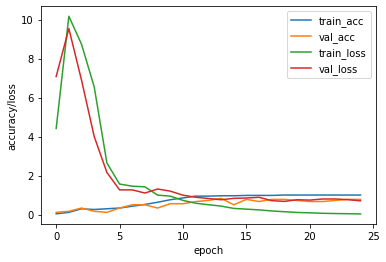

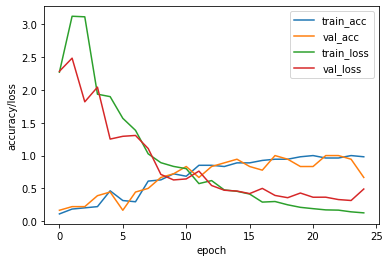

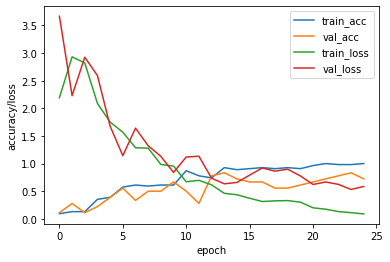

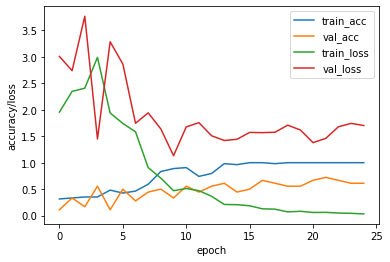

In [12]:
for hist in histories1:
    pp.plot_hist(hist)

<h2> Expriment2:</h2>

In [13]:
net2 = models.Sequential()
net2.add(layers.Dense(300, input_shape = (480,6)))
net2.add(layers.Flatten())
net2.add(layers.Dense(240,activation='relu'))
net2.add(layers.Dense(180,activation='relu'))
net2.add(layers.Dense(180,activation='relu'))
net2.add(layers.Dense(7, activation = 'softmax'))
net2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 480, 300)          2100      
_________________________________________________________________
flatten_3 (Flatten)          (None, 144000)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 240)               34560240  
_________________________________________________________________
dense_13 (Dense)             (None, 180)               43380     
_________________________________________________________________
dense_14 (Dense)             (None, 180)               32580     
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 1267      
Total params: 34,639,567
Trainable params: 34,639,567
Non-trainable params: 0
__________________________________________

In [14]:
net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

histories2 = []
results_list2 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net2.load_weights('net2.h5')
    history = net2.fit(train_fold, train_tgt, epochs = 30, validation_data = (val_fold, val_tgt))

    histories2.append(history)
    
    
    results = net2.evaluate(test_data, test_labels)
    results_list2.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration2 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/30
54/54 [==============================] - 1s 18ms/step - loss: 2.3204 - accuracy: 0.0926 - val_loss: 5.2403 - val_accuracy: 0.2778
Epoch 2/30
54/54 [==============================] - 1s 15ms/step - loss: 5.0917 - accuracy: 0.1667 - val_loss: 5.2664 - val_accuracy: 0.0556
Epoch 3/30
54/54 [==============================] - 1s 16ms/step - loss: 3.4693 - accuracy: 0.2037 - val_loss: 2.2061 - val_accuracy: 0.3889
Epoch 4/30
54/54 [==============================] - 1s 16ms/step - loss: 2.0152 - accuracy: 0.3519 - val_loss: 1.7182 - val_accuracy: 0.2778
Epoch 5/30
54/54 [==============================] - 1s 16ms/step - loss: 1.6007 - accuracy: 0.3333 - val_loss: 1.8173 - val_accuracy: 0.2778
Epoch 6/30
54/54 [==============================] - 1s 16ms/step - loss: 1.5339 - accuracy: 0.4815 - val_loss: 1.3783 - val_accuracy: 0.5556
Epoch 7/30
54/54 [==============================] - 1s 16ms/step - loss: 1.2437 - accuracy: 0.5185 - val_los

Epoch 23/30
54/54 [==============================] - 1s 16ms/step - loss: 0.0741 - accuracy: 1.0000 - val_loss: 1.2165 - val_accuracy: 0.7222
Epoch 24/30
54/54 [==============================] - 1s 16ms/step - loss: 0.0648 - accuracy: 1.0000 - val_loss: 1.2828 - val_accuracy: 0.6667
Epoch 25/30
54/54 [==============================] - 1s 16ms/step - loss: 0.0544 - accuracy: 1.0000 - val_loss: 1.4886 - val_accuracy: 0.5556
Epoch 26/30
54/54 [==============================] - 1s 16ms/step - loss: 0.0465 - accuracy: 1.0000 - val_loss: 1.5306 - val_accuracy: 0.5000
Epoch 27/30
54/54 [==============================] - 1s 16ms/step - loss: 0.0348 - accuracy: 1.0000 - val_loss: 1.3810 - val_accuracy: 0.6667
Epoch 28/30
54/54 [==============================] - 1s 16ms/step - loss: 0.0281 - accuracy: 1.0000 - val_loss: 1.3051 - val_accuracy: 0.7778
Epoch 29/30
54/54 [==============================] - 1s 16ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 1.3928 - val_accuracy: 0.7778
Epoch 

In [15]:
avg = np.mean(results_list2, axis=0)
std_dev = np.std(results_list2, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration2))

Average loss and accuracy scores were:  [0.54161124 0.73333335]
Standard deviation for loss & accuracy:  [0.06802084 0.04714045]
Duration in seconds:  103


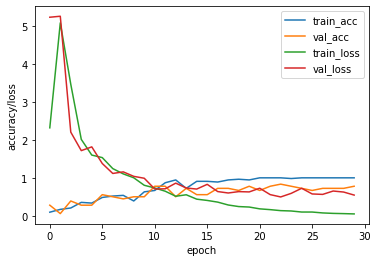

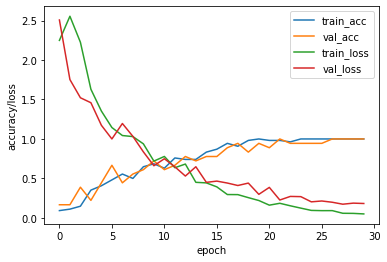

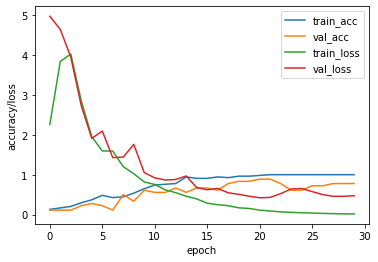

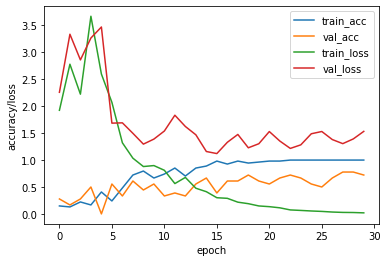

In [16]:
for hist in histories2:
    pp.plot_hist(hist)

<h2> Expriment3:</h2>

In [17]:
net3 = models.Sequential()
net3.add(layers.Dense(300, input_shape = (480,6)))
net3.add(layers.Flatten())
net3.add(layers.Dense(300,activation='relu'))
net3.add(layers.Dense(240,activation='relu'))
net3.add(layers.Dense(240,activation='relu'))
net3.add(layers.Dense(7, activation = 'softmax'))
net3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 480, 300)          2100      
_________________________________________________________________
flatten_4 (Flatten)          (None, 144000)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 300)               43200300  
_________________________________________________________________
dense_18 (Dense)             (None, 240)               72240     
_________________________________________________________________
dense_19 (Dense)             (None, 240)               57840     
_________________________________________________________________
dense_20 (Dense)             (None, 7)                 1687      
Total params: 43,334,167
Trainable params: 43,334,167
Non-trainable params: 0
__________________________________________

In [18]:
net3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net3.save_weights('net3.h5')  # each split will start with same weights so can directly compare results

histories3 = []
results_list3 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net3.load_weights('net3.h5')
    history = net3.fit(train_fold, train_tgt, epochs = 30, validation_data = (val_fold, val_tgt))

    histories3.append(history)
    
    
    results = net3.evaluate(test_data, test_labels)
    results_list3.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration3 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/30
54/54 [==============================] - 1s 23ms/step - loss: 2.8435 - accuracy: 0.1296 - val_loss: 9.1135 - val_accuracy: 0.1667
Epoch 2/30
54/54 [==============================] - 1s 21ms/step - loss: 6.9743 - accuracy: 0.1852 - val_loss: 5.8049 - val_accuracy: 0.1111
Epoch 3/30
54/54 [==============================] - 1s 20ms/step - loss: 5.4395 - accuracy: 0.1667 - val_loss: 2.9210 - val_accuracy: 0.2778
Epoch 4/30
54/54 [==============================] - 1s 21ms/step - loss: 2.3651 - accuracy: 0.2593 - val_loss: 2.6341 - val_accuracy: 0.1111
Epoch 5/30
54/54 [==============================] - 1s 21ms/step - loss: 2.2012 - accuracy: 0.1296 - val_loss: 2.2559 - val_accuracy: 0.1667
Epoch 6/30
54/54 [==============================] - 1s 21ms/step - loss: 1.7608 - accuracy: 0.3148 - val_loss: 1.7982 - val_accuracy: 0.2778
Epoch 7/30
54/54 [==============================] - 1s 22ms/step - loss: 1.4498 - accuracy: 0.4074 - val_los

Epoch 23/30
54/54 [==============================] - 1s 21ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.4585 - val_accuracy: 0.7222
Epoch 24/30
54/54 [==============================] - 1s 21ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.5130 - val_accuracy: 0.7222
Epoch 25/30
54/54 [==============================] - 1s 21ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.5560 - val_accuracy: 0.7222
Epoch 26/30
54/54 [==============================] - 1s 21ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.5862 - val_accuracy: 0.7778
Epoch 27/30
54/54 [==============================] - 1s 21ms/step - loss: 9.8926e-04 - accuracy: 1.0000 - val_loss: 1.6097 - val_accuracy: 0.7778
Epoch 28/30
54/54 [==============================] - 1s 21ms/step - loss: 8.0878e-04 - accuracy: 1.0000 - val_loss: 1.6251 - val_accuracy: 0.7778
Epoch 29/30
54/54 [==============================] - 1s 21ms/step - loss: 7.0043e-04 - accuracy: 1.0000 - val_loss: 1.6293 - val_accuracy: 0

In [19]:
avg = np.mean(results_list3, axis=0)
std_dev = np.std(results_list3, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration3))

Average loss and accuracy scores were:  [0.55917575 0.76666668]
Standard deviation for loss & accuracy:  [0.22881432 0.07453559]
Duration in seconds:  136


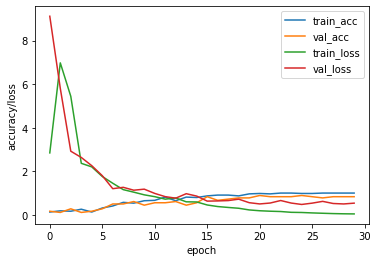

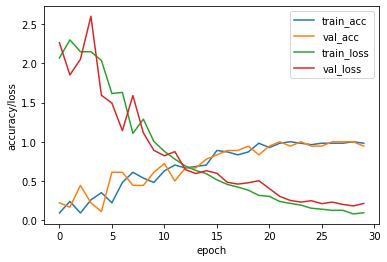

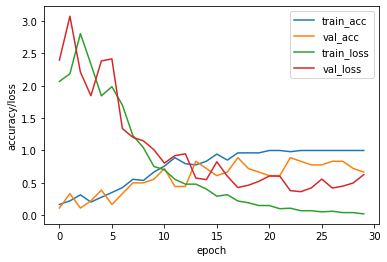

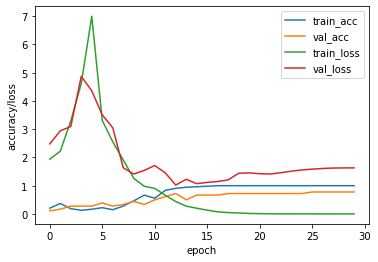

In [20]:
for hist in histories3:
    pp.plot_hist(hist)

<h2> Expriment3a:</h2>

In [21]:
net3 = models.Sequential()
net3.add(layers.Dense((240), input_shape = (480,6)))
net3.add(layers.Flatten())
net3.add(layers.Dense(240,activation='relu'))
net3.add(layers.Dense(180,activation='relu'))
net3.add(layers.Dense(180,activation='relu'))
net3.add(layers.Dense(7, activation = 'softmax'))
net3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 480, 240)          1680      
_________________________________________________________________
flatten_5 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 240)               27648240  
_________________________________________________________________
dense_23 (Dense)             (None, 180)               43380     
_________________________________________________________________
dense_24 (Dense)             (None, 180)               32580     
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 1267      
Total params: 27,727,147
Trainable params: 27,727,147
Non-trainable params: 0
__________________________________________

In [22]:
net3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net3.save_weights('net3.h5')  # each split will start with same weights so can directly compare results

histories3 = []
results_list3 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net3.load_weights('net3.h5')
    history = net3.fit(train_fold, train_tgt, epochs = 30, validation_data = (val_fold, val_tgt))

    histories3.append(history)
    
    
    results = net3.evaluate(test_data, test_labels)
    results_list3.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration3 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/30
54/54 [==============================] - 1s 16ms/step - loss: 3.8860 - accuracy: 0.1667 - val_loss: 5.7252 - val_accuracy: 0.1667
Epoch 2/30
54/54 [==============================] - 1s 13ms/step - loss: 4.1503 - accuracy: 0.2037 - val_loss: 2.9502 - val_accuracy: 0.1667
Epoch 3/30
54/54 [==============================] - 1s 13ms/step - loss: 2.4024 - accuracy: 0.2778 - val_loss: 2.2254 - val_accuracy: 0.3333
Epoch 4/30
54/54 [==============================] - 1s 14ms/step - loss: 2.1488 - accuracy: 0.1481 - val_loss: 1.5890 - val_accuracy: 0.3333
Epoch 5/30
54/54 [==============================] - 1s 14ms/step - loss: 1.6041 - accuracy: 0.3704 - val_loss: 2.0359 - val_accuracy: 0.4444
Epoch 6/30
54/54 [==============================] - 1s 14ms/step - loss: 1.6257 - accuracy: 0.5185 - val_loss: 1.8183 - val_accuracy: 0.5556
Epoch 7/30
54/54 [==============================] - 1s 13ms/step - loss: 1.3372 - accuracy: 0.7222 - val_los

Epoch 23/30
54/54 [==============================] - 1s 13ms/step - loss: 0.0786 - accuracy: 0.9815 - val_loss: 1.5380 - val_accuracy: 0.6667
Epoch 24/30
54/54 [==============================] - 1s 14ms/step - loss: 0.0410 - accuracy: 1.0000 - val_loss: 1.7468 - val_accuracy: 0.6667
Epoch 25/30
54/54 [==============================] - 1s 13ms/step - loss: 0.0556 - accuracy: 0.9815 - val_loss: 1.5596 - val_accuracy: 0.6667
Epoch 26/30
54/54 [==============================] - 1s 14ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 1.4533 - val_accuracy: 0.6667
Epoch 27/30
54/54 [==============================] - 1s 14ms/step - loss: 0.0290 - accuracy: 1.0000 - val_loss: 1.5616 - val_accuracy: 0.6111
Epoch 28/30
54/54 [==============================] - 1s 13ms/step - loss: 0.0242 - accuracy: 1.0000 - val_loss: 1.7384 - val_accuracy: 0.6111
Epoch 29/30
54/54 [==============================] - 1s 13ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 1.7563 - val_accuracy: 0.6667
Epoch 

In [23]:
avg = np.mean(results_list3, axis=0)
std_dev = np.std(results_list3, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration3))

Average loss and accuracy scores were:  [0.55815145 0.81666668]
Standard deviation for loss & accuracy:  [0.16176786 0.05527708]
Duration in seconds:  88


<h2> Expriment4:</h2>

In [35]:
net4 = models.Sequential()
net4.add(layers.Dense((240), input_shape = (480,6)))
net4.add(layers.Flatten())
net4.add(layers.Dense(240,activation='relu'))
net4.add(layers.Dense(240,activation='relu'))
net4.add(layers.Dense(7, activation = 'softmax'))
net4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 480, 240)          1680      
_________________________________________________________________
flatten_9 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_41 (Dense)             (None, 240)               27648240  
_________________________________________________________________
dense_42 (Dense)             (None, 240)               57840     
_________________________________________________________________
dense_43 (Dense)             (None, 7)                 1687      
Total params: 27,709,447
Trainable params: 27,709,447
Non-trainable params: 0
_________________________________________________________________


In [36]:
net4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net4.save_weights('net4.h5')  # each split will start with same weights so can directly compare results

histories4 = []
results_list4 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net4.load_weights('net4.h5')
    history = net4.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories4.append(history)
    
    
    results = net4.evaluate(test_data, test_labels)
    results_list4.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration4 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 1s 18ms/step - loss: 5.2779 - accuracy: 0.1111 - val_loss: 5.3138 - val_accuracy: 0.1111
Epoch 2/25
54/54 [==============================] - 1s 12ms/step - loss: 4.4233 - accuracy: 0.2037 - val_loss: 3.2722 - val_accuracy: 0.2222
Epoch 3/25
54/54 [==============================] - 1s 13ms/step - loss: 3.4625 - accuracy: 0.1481 - val_loss: 2.8468 - val_accuracy: 0.2778
Epoch 4/25
54/54 [==============================] - 1s 13ms/step - loss: 2.5233 - accuracy: 0.2407 - val_loss: 1.9457 - val_accuracy: 0.3333
Epoch 5/25
54/54 [==============================] - 1s 13ms/step - loss: 1.6806 - accuracy: 0.4074 - val_loss: 2.2552 - val_accuracy: 0.2778
Epoch 6/25
54/54 [==============================] - 1s 13ms/step - loss: 1.8505 - accuracy: 0.3704 - val_loss: 1.7438 - val_accuracy: 0.5000
Epoch 7/25
54/54 [==============================] - 1s 13ms/step - loss: 1.3919 - accuracy: 0.5000 - val_los

In [37]:
avg = np.mean(results_list4, axis=0)
std_dev = np.std(results_list4, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration4))

Average loss and accuracy scores were:  [0.51805653 0.80000001]
Standard deviation for loss & accuracy:  [0.0471058  0.04714045]
Duration in seconds:  71


<h2> Best performing FFN do not touch!</h2>

In [27]:
net5 = models.Sequential()
net5.add(layers.Dense((480), input_shape = (480,6)))
net5.add(layers.Flatten())
net5.add(layers.Dense(240,activation='relu'))
net5.add(layers.Dense(240,activation='relu'))
net5.add(layers.Dense(7, activation = 'softmax'))
net5.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_7 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_32 (Dense)             (None, 240)               55296240  
_________________________________________________________________
dense_33 (Dense)             (None, 240)               57840     
_________________________________________________________________
dense_34 (Dense)             (None, 7)                 1687      
Total params: 55,359,127
Trainable params: 55,359,127
Non-trainable params: 0
_________________________________________________________________


In [29]:
avg = np.mean(results_list5, axis=0)
std_dev = np.std(results_list5, axis=0)
print('Avecrage loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration5))

Avecrage loss and accuracy scores were:  [0.55663788 0.83333334]
Standard deviation for loss & accuracy:  [0.119272   0.07453559]
Duration in seconds:  146


In [28]:
net5.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net5.save_weights('net5.h5')  # each split will start with same weights so can directly compare results

histories5 = []
results_list5 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net5.load_weights('net5.h5')
    history = net5.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories5.append(history)
    
    
    results = net5.evaluate(test_data, test_labels)
    results_list5.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration5 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 2s 29ms/step - loss: 6.8616 - accuracy: 0.0926 - val_loss: 7.0489 - val_accuracy: 0.0000e+00
Epoch 2/25
54/54 [==============================] - 1s 26ms/step - loss: 5.5443 - accuracy: 0.0926 - val_loss: 5.9794 - val_accuracy: 0.1111
Epoch 3/25
54/54 [==============================] - 1s 27ms/step - loss: 6.5194 - accuracy: 0.1481 - val_loss: 5.3040 - val_accuracy: 0.2222
Epoch 4/25
54/54 [==============================] - 1s 27ms/step - loss: 5.4341 - accuracy: 0.1111 - val_loss: 2.7533 - val_accuracy: 0.2778
Epoch 5/25
54/54 [==============================] - 1s 27ms/step - loss: 2.3979 - accuracy: 0.2778 - val_loss: 2.0095 - val_accuracy: 0.2222
Epoch 6/25
54/54 [==============================] - 1s 27ms/step - loss: 2.2308 - accuracy: 0.2963 - val_loss: 1.4919 - val_accuracy: 0.5556
Epoch 7/25
54/54 [==============================] - 1s 26ms/step - loss: 1.6877 - accuracy: 0.5370 - val

In [34]:
net5.save('best_performing_FFN.h5')

<h2> Expriment6:</h2>

In [4]:
net6 = models.Sequential()
net6.add(layers.Dense((480), input_shape = (480,6)))
net6.add(layers.Flatten())
net6.add(layers.Dense(120,activation='relu'))
net6.add(layers.Dense(120,activation='relu'))
net6.add(layers.Dense(7, activation = 'softmax'))
net6.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 480, 480)          3360      
_________________________________________________________________
flatten_1 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               27648120  
_________________________________________________________________
dense_3 (Dense)              (None, 120)               14520     
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 847       
Total params: 27,666,847
Trainable params: 27,666,847
Non-trainable params: 0
_________________________________________________________________


In [5]:
net6.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net6.save_weights('net6.h5')  # each split will start with same weights so can directly compare results

histories6 = []
results_list6 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net6.load_weights('net6.h5')
    history = net6.fit(train_fold, train_tgt, epochs = 30, validation_data = (val_fold, val_tgt))

    histories6.append(history)
    
    
    results = net6.evaluate(test_data, test_labels)
    results_list6.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration6 = finish - start

0

Train on 54 samples, validate on 18 samples
Epoch 1/30
54/54 [==============================] - 1s 15ms/step - loss: 3.3571 - accuracy: 0.1296 - val_loss: 8.7295 - val_accuracy: 0.1111
Epoch 2/30
54/54 [==============================] - 1s 13ms/step - loss: 9.1456 - accuracy: 0.1111 - val_loss: 9.2024 - val_accuracy: 0.2778
Epoch 3/30
54/54 [==============================] - 1s 13ms/step - loss: 6.9117 - accuracy: 0.2593 - val_loss: 3.2519 - val_accuracy: 0.4444
Epoch 4/30
54/54 [==============================] - 1s 13ms/step - loss: 2.0809 - accuracy: 0.4074 - val_loss: 2.7724 - val_accuracy: 0.2222
Epoch 5/30
54/54 [==============================] - 1s 13ms/step - loss: 2.7790 - accuracy: 0.2593 - val_loss: 2.7439 - val_accuracy: 0.1111
Epoch 6/30
54/54 [==============================] - 1s 13ms/step - loss: 2.0767 - accuracy: 0.3148 - val_loss: 1.5120 - val_accuracy: 0.3333
Epoch 7/30
54/54 [==============================] - 1s 13ms/step - loss: 1.2425 - accuracy: 0.5000 - val_lo

Epoch 26/30
54/54 [==============================] - 1s 13ms/step - loss: 0.1622 - accuracy: 0.9815 - val_loss: 0.2719 - val_accuracy: 1.0000
Epoch 27/30
54/54 [==============================] - 1s 13ms/step - loss: 0.1631 - accuracy: 0.9815 - val_loss: 0.2641 - val_accuracy: 1.0000
Epoch 28/30
54/54 [==============================] - 1s 14ms/step - loss: 0.1450 - accuracy: 0.9815 - val_loss: 0.2990 - val_accuracy: 0.9444
Epoch 29/30
54/54 [==============================] - 1s 13ms/step - loss: 0.1340 - accuracy: 0.9815 - val_loss: 0.2524 - val_accuracy: 1.0000
Epoch 30/30
15/15 [==============================] - 0s 1ms/step
[0.574117124080658, 0.7333333492279053]
2
Train on 54 samples, validate on 18 samples
Epoch 1/30
54/54 [==============================] - 1s 13ms/step - loss: 1.9814 - accuracy: 0.0926 - val_loss: 2.8829 - val_accuracy: 0.1111
Epoch 2/30
54/54 [==============================] - 1s 13ms/step - loss: 2.4997 - accuracy: 0.1852 - val_loss: 3.0882 - val_accuracy: 0.1111

Epoch 22/30
54/54 [==============================] - 1s 14ms/step - loss: 0.1688 - accuracy: 1.0000 - val_loss: 1.1500 - val_accuracy: 0.6111
Epoch 23/30
54/54 [==============================] - 1s 13ms/step - loss: 0.1458 - accuracy: 1.0000 - val_loss: 1.1547 - val_accuracy: 0.6667
Epoch 24/30
54/54 [==============================] - 1s 14ms/step - loss: 0.1330 - accuracy: 1.0000 - val_loss: 1.2175 - val_accuracy: 0.6667
Epoch 25/30
54/54 [==============================] - 1s 13ms/step - loss: 0.1196 - accuracy: 1.0000 - val_loss: 1.2769 - val_accuracy: 0.6667
Epoch 26/30
54/54 [==============================] - 1s 13ms/step - loss: 0.1055 - accuracy: 1.0000 - val_loss: 1.2720 - val_accuracy: 0.6111
Epoch 27/30
54/54 [==============================] - 1s 14ms/step - loss: 0.0944 - accuracy: 1.0000 - val_loss: 1.2498 - val_accuracy: 0.5556
Epoch 28/30
54/54 [==============================] - 1s 13ms/step - loss: 0.0876 - accuracy: 1.0000 - val_loss: 1.1984 - val_accuracy: 0.6111
Epoch 

In [6]:
avg = np.mean(results_list6, axis=0)
std_dev = np.std(results_list6, axis=0)
print('Avecrage loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration6))

Avecrage loss and accuracy scores were:  [0.47744983 0.80000001]
Standard deviation for loss & accuracy:  [0.07608683 0.04714045]
Duration in seconds:  86


<h2> Expriment7:</h2>

In [52]:
net7 = models.Sequential()
net7.add(layers.Dense((480), input_shape = (480,6)))
net7.add(layers.Flatten())
net7.add(layers.Dense(240,activation='sigmoid'))
net7.add(layers.Dense(240,activation='relu'))
net7.add(layers.Dense(240, activation='relu'))
net7.add(layers.Dense(7, activation = 'softmax'))
net7.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_16 (Flatten)         (None, 230400)            0         
_________________________________________________________________
dense_75 (Dense)             (None, 240)               55296240  
_________________________________________________________________
dense_76 (Dense)             (None, 240)               57840     
_________________________________________________________________
dense_77 (Dense)             (None, 240)               57840     
_________________________________________________________________
dense_78 (Dense)             (None, 7)                 1687      
Total params: 55,416,967
Trainable params: 55,416,967
Non-trainable params: 0
_________________________________________

In [53]:
net7.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net7.save_weights('net7.h5')  # each split will start with same weights so can directly compare results

histories7 = []
results_list7 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net7.load_weights('net7.h5')
    history = net7.fit(train_fold, train_tgt, epochs = 30, validation_data = (val_fold, val_tgt))

    histories7.append(history)
    
    
    results = net7.evaluate(test_data, test_labels)
    results_list7.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration7 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/30
54/54 [==============================] - 2s 34ms/step - loss: 2.1265 - accuracy: 0.1296 - val_loss: 1.7970 - val_accuracy: 0.2778
Epoch 2/30
54/54 [==============================] - 1s 26ms/step - loss: 1.9519 - accuracy: 0.1667 - val_loss: 1.7282 - val_accuracy: 0.2222
Epoch 3/30
54/54 [==============================] - 1s 27ms/step - loss: 1.8117 - accuracy: 0.2593 - val_loss: 1.7379 - val_accuracy: 0.3889
Epoch 4/30
54/54 [==============================] - 1s 27ms/step - loss: 1.7867 - accuracy: 0.3333 - val_loss: 1.7261 - val_accuracy: 0.4444
Epoch 5/30
54/54 [==============================] - 1s 27ms/step - loss: 1.7316 - accuracy: 0.3704 - val_loss: 1.6342 - val_accuracy: 0.5000
Epoch 6/30
54/54 [==============================] - 1s 27ms/step - loss: 1.6752 - accuracy: 0.4444 - val_loss: 1.5279 - val_accuracy: 0.5000
Epoch 7/30
54/54 [==============================] - 1s 27ms/step - loss: 1.5887 - accuracy: 0.4815 - val_los

Epoch 23/30
54/54 [==============================] - 1s 27ms/step - loss: 0.2842 - accuracy: 0.9630 - val_loss: 1.3544 - val_accuracy: 0.4444
Epoch 24/30
54/54 [==============================] - 1s 27ms/step - loss: 0.2398 - accuracy: 0.9630 - val_loss: 1.1224 - val_accuracy: 0.6667
Epoch 25/30
54/54 [==============================] - 1s 27ms/step - loss: 0.2678 - accuracy: 0.9444 - val_loss: 1.1532 - val_accuracy: 0.6111
Epoch 26/30
54/54 [==============================] - 1s 27ms/step - loss: 0.1914 - accuracy: 1.0000 - val_loss: 1.3713 - val_accuracy: 0.5000
Epoch 27/30
54/54 [==============================] - 1s 28ms/step - loss: 0.1982 - accuracy: 0.9630 - val_loss: 1.1317 - val_accuracy: 0.6667
Epoch 28/30
54/54 [==============================] - 1s 27ms/step - loss: 0.1389 - accuracy: 0.9630 - val_loss: 1.1788 - val_accuracy: 0.7222
Epoch 29/30
54/54 [==============================] - 1s 27ms/step - loss: 0.1336 - accuracy: 0.9630 - val_loss: 1.3249 - val_accuracy: 0.6111
Epoch 

In [54]:
avg = np.mean(results_list7, axis=0)
std_dev = np.std(results_list7, axis=0)
print('Avecrage loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration6))

Avecrage loss and accuracy scores were:  [0.52761868 0.80000001]
Standard deviation for loss & accuracy:  [0.10217855 0.08164965]
Duration in seconds:  178
